# **Mount Drive**
Menghubungkan folder dataset di drive ke google colab

Pastikan akun yang digunakan untuk membuka colab ini memakai akun bangkit.
Cek drive bangkit bagian shared drives, harus ada Capstone

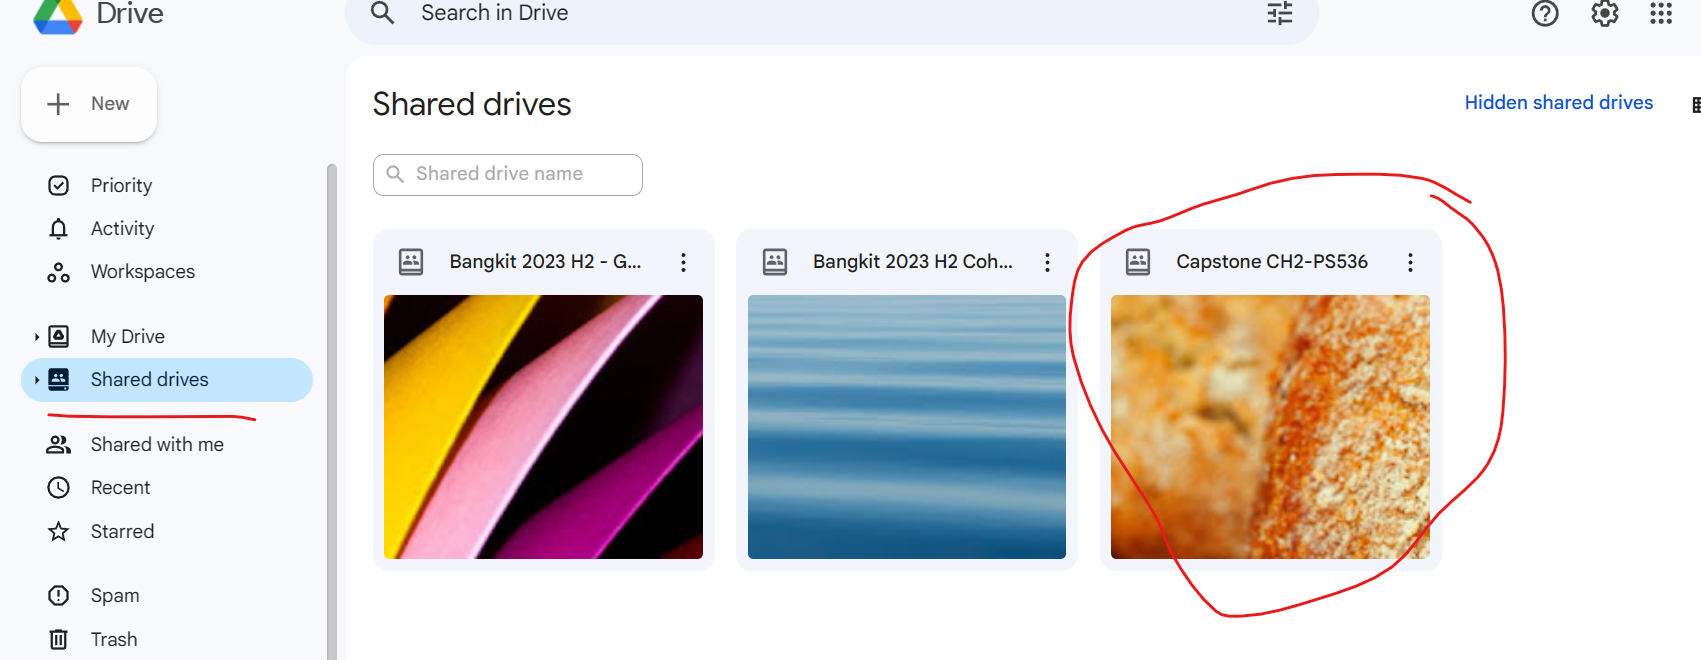

In [1]:
# pastikan buka model ini pakai email bangkit ya guys, dan pastikan di Shared drive ada Capstone CH2-PS536
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import library**
Import libraries yang dibutuhkan untuk model

In [2]:
! pip install split-folders

In [3]:
! pip install tflite-support-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 24.1 MB/s eta 0:00:00


In [4]:
import os
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from google.colab import files
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import ModelCheckpoint


# **Prepare the Dataset**
menyiapkan dataset hingga siap digunakan untuk modeling

Hasil import akan terlihat di menu file sebelah kiri

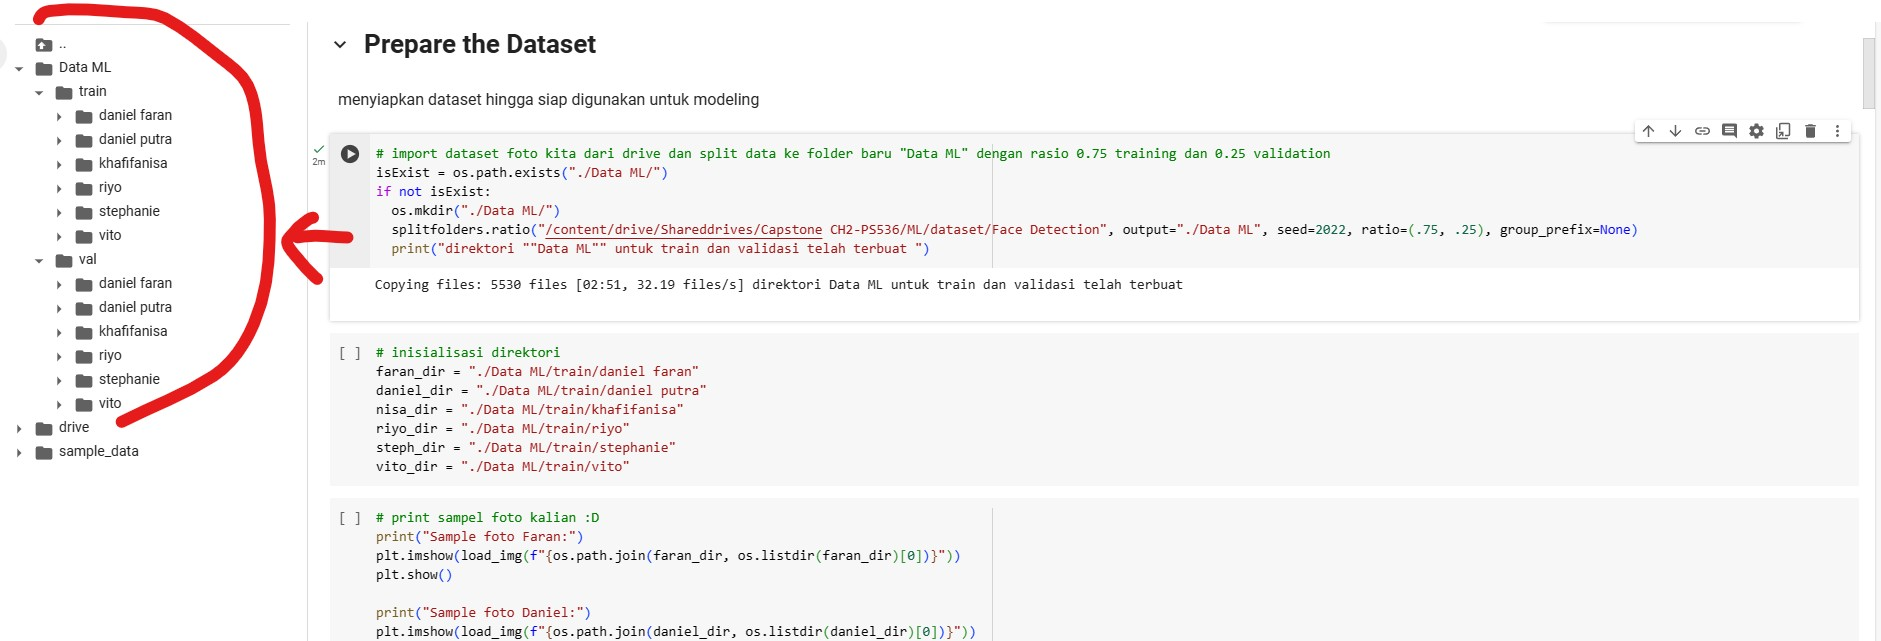


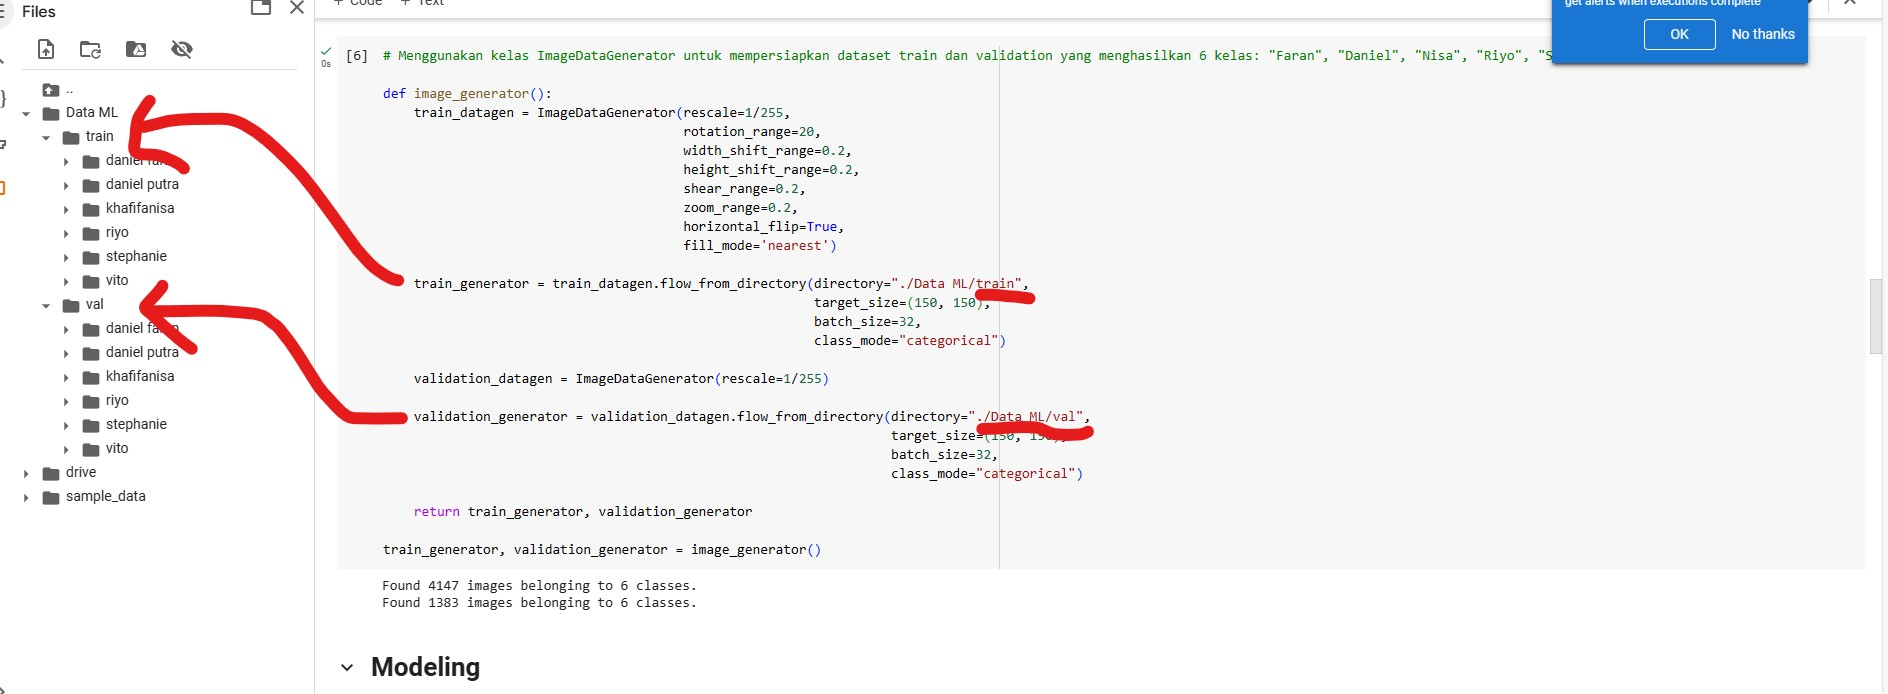


In [15]:
# import dataset foto kita dari drive dan split data ke folder baru "Data ML" dengan rasio 0.75 training dan 0.25 validation
isExist = os.path.exists("./Data ML/")
if not isExist:
  os.mkdir("./Data ML/")
  splitfolders.ratio("/content/drive/Shareddrives/Capstone CH2-PS536/ML/dataset/Face Detection", output="./Data ML", seed=2022, ratio=(.75, .25), group_prefix=None)
  print("direktori ""Data ML"" untuk train dan validasi telah terbuat ")

Copying files: 184 files [01:14,  2.48 files/s]

direktori Data ML untuk train dan validasi telah terbuat 


In [16]:
# inisialisasi direktori
faran_dir = "./Data ML/train/Daniel Faran Krisdianto"
daniel_dir = "./Data ML/train/Daniel Putra Tama Simarmata"
nisa_dir = "./Data ML/train/Khafifanisa"
riyo_dir = "./Data ML/train/Riyo Kurnia Adjie"
steph_dir = "./Data ML/train/Stephanie Hutagalung"
vito_dir = "./Data ML/train/Michel Vito Adinugroho"

Sample foto Faran:


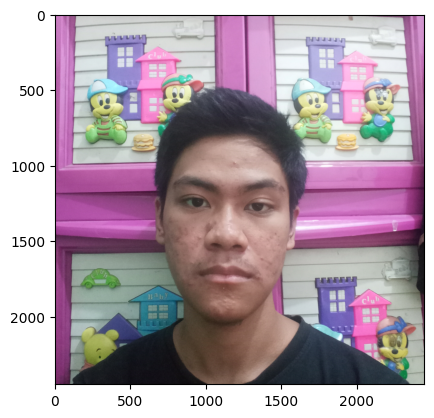

Sample foto Daniel:


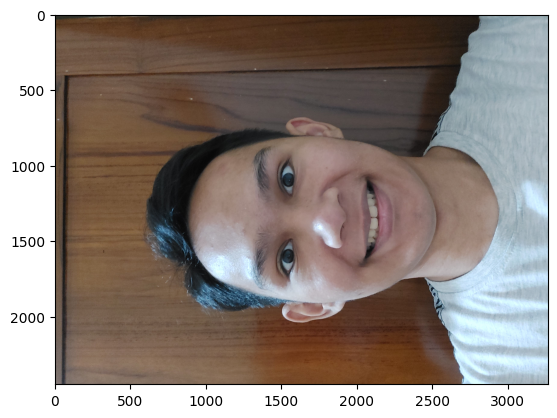

Sample foto Nisa:


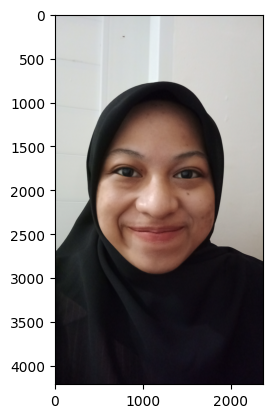

Sample foto Riyo:


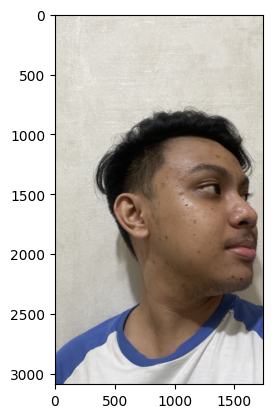

Sample foto Steph:


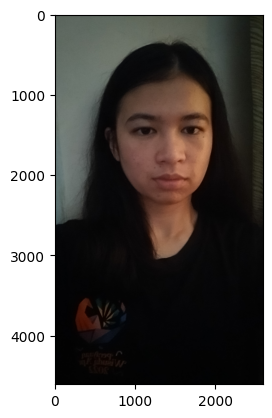

Sample foto Vito:


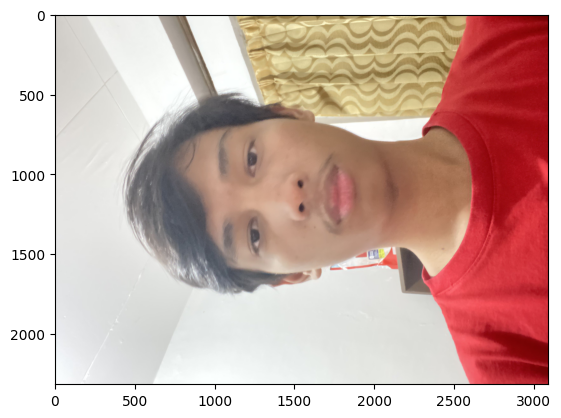

In [17]:
# print sampel foto kalian :D
print("Sample foto Faran:")
plt.imshow(load_img(f"{os.path.join(faran_dir, os.listdir(faran_dir)[0])}"))
plt.show()

print("Sample foto Daniel:")
plt.imshow(load_img(f"{os.path.join(daniel_dir, os.listdir(daniel_dir)[0])}"))
plt.show()

print("Sample foto Nisa:")
plt.imshow(load_img(f"{os.path.join(nisa_dir, os.listdir(nisa_dir)[0])}"))
plt.show()

print("Sample foto Riyo:")
plt.imshow(load_img(f"{os.path.join(riyo_dir, os.listdir(riyo_dir)[0])}"))
plt.show()

print("Sample foto Steph:")
plt.imshow(load_img(f"{os.path.join(steph_dir, os.listdir(steph_dir)[0])}"))
plt.show()

print("Sample foto Vito:")
plt.imshow(load_img(f"{os.path.join(vito_dir, os.listdir(vito_dir)[0])}"))
plt.show()

In [18]:
# AUTOMATIC SPLIT
# Menggunakan kelas ImageDataGenerator untuk mempersiapkan dataset train dan validation yang menghasilkan 6 kelas: "Faran", "Daniel", "Nisa", "Riyo", "Steph", dan "Vito"

def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255,
                                       rotation_range=90,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory="./Data ML/train",
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode="categorical")

    validation_datagen = ImageDataGenerator(rescale=1/255)

    validation_generator = validation_datagen.flow_from_directory(directory="./Data ML/val",
                                                                  target_size=(150, 150),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

    return train_generator, validation_generator

train_generator, validation_generator = image_generator()

Found 135 images belonging to 6 classes.
Found 49 images belonging to 6 classes.


In [5]:
# MANUAL TRAIN VAL
# Menggunakan kelas ImageDataGenerator untuk mempersiapkan dataset train dan validation yang menghasilkan 6 kelas: "Faran", "Daniel", "Nisa", "Riyo", "Steph", dan "Vito"

def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory="/content/drive/Shareddrives/Capstone CH2-PS536/ML/dataset/Manual Train Validation/train",
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode="categorical")

    validation_datagen = ImageDataGenerator(rescale=1/255)

    validation_generator = validation_datagen.flow_from_directory(directory="/content/drive/Shareddrives/Capstone CH2-PS536/ML/dataset/Manual Train Validation/val",
                                                                  target_size=(150, 150),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

    return train_generator, validation_generator

train_generator, validation_generator = image_generator()

Found 3007 images belonging to 6 classes.
Found 361 images belonging to 6 classes.


# **Modeling**
membuat model

In [19]:
#build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [20]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training Model**
melakukan training model


In [24]:
# mempersiapkan checkpoint sementara
datasource_path = "/content/drive/Shareddrives/Capstone CH2-PS536/ML/model/checkpoint"
checkpoint = ModelCheckpoint(datasource_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#pembuatan callback untuk membatasi training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > 0.8) & (logs.get('loss') < 0.1):
            print("\nAkurasi memenuhi kriteria, hentikan pelatihan!")
            self.model.stop_training = True
#def callback
yocallbacks = myCallback()

In [25]:
#train the model
his = model.fit(train_generator,validation_data=validation_generator,epochs=1000, steps_per_epoch=5, callbacks=[yocallbacks])

Epoch 1/1000
5/5 [==============================] - 21s 5s/step - loss: 0.1646 - accuracy: 0.9333 - val_loss: 1.9204 - val_accuracy: 0.8367
Epoch 2/1000
5/5 [==============================] - 21s 4s/step - loss: 0.1472 - accuracy: 0.9556 - val_loss: 2.0983 - val_accuracy: 0.8776
Epoch 3/1000
5/5 [==============================] - 19s 3s/step - loss: 0.1846 - accuracy: 0.9259 - val_loss: 1.6595 - val_accuracy: 0.8980
Epoch 4/1000
5/5 [==============================] - 20s 4s/step - loss: 0.0877 - accuracy: 0.9704 - val_loss: 1.6790 - val_accuracy: 0.7959
Epoch 5/1000
5/5 [==============================] - 22s 5s/step - loss: 0.1457 - accuracy: 0.9333 - val_loss: 1.6565 - val_accuracy: 0.7959
Epoch 6/1000
5/5 [==============================] - 21s 4s/step - loss: 0.1449 - accuracy: 0.9407 - val_loss: 2.3675 - val_accuracy: 0.8163
Epoch 7/1000
5/5 [==============================] - 21s 4s/step - loss: 0.1671 - accuracy: 0.9481 - val_loss: 2.0492 - val_accuracy: 0.8571
Epoch 8/1000
5/5 [==

Text(0.5, 1.0, 'Training and validation loss')

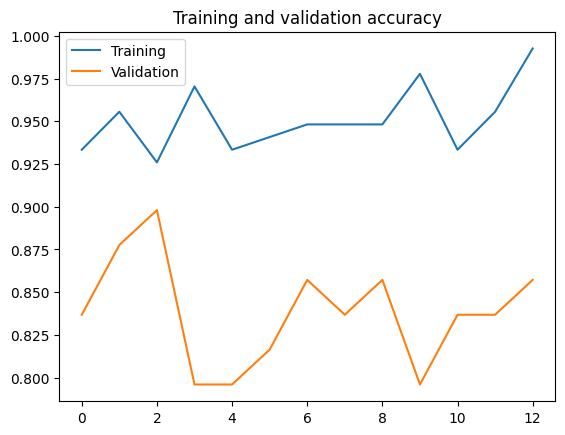

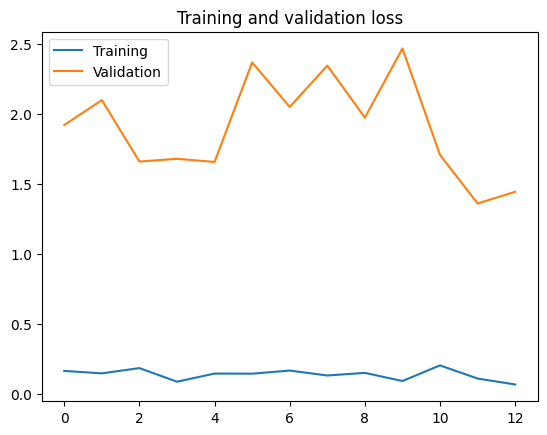

In [26]:
#plot accuracy and loss
acc      = his.history['accuracy']
val_acc  = his.history['val_accuracy']
loss     = his.history['loss']
val_loss = his.history['val_loss']

#get number of epochs
epochs   = range(len(acc))

#plot accuracy
plt.plot  (epochs, acc, label='Training')
plt.plot  (epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#plot loss
plt.plot  (epochs, loss, label='Training')
plt.plot  (epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Evaluate Model**
mengevaluasi model yang telah dibuat

In [27]:
# load best model weight yang ada di checkpoint
model.load_weights('/content/drive/Shareddrives/Capstone CH2-PS536/ML/model/checkpoint')

In [28]:
# mengevaluasi akurasi model dari validation generator
model.evaluate(validation_generator)

2/2 [==============================] - 4s 828ms/step - loss: 17.7854 - accuracy: 0.2245


[17.785432815551758, 0.22448979318141937]

In [ ]:

# test predicton
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x /= 255.0
  prob = model.predict(x)
  print(model.predict(x))
  classes = np.argmax(prob)
  print(classes)
  if classes == 0:
    print("daniel")
  elif classes == 1:
    print("riyo")
  elif classes == 2:
    print("faran") #nisa
  elif classes == 3:
    print("nisa")
  elif classes == 4:
    print("steph")
  elif classes == 5:
    print("vito")
  else:
    print("Data Karyawan Tidak Ditemukan")

Saving IMG20231220114122.jpg to IMG20231220114122.jpg
1/1 [==============================] - 0s 39ms/step
[[8.3442381e-10 1.0000000e+00 3.0671600e-08 8.5857987e-09 2.1781407e-10
  1.2336459e-12]]
1
riyo


# **Save Model**
menyimpan model ke file h5 dan mengkonversi menajdi tf.lite



Perhatikan lokasi penyimpanan:
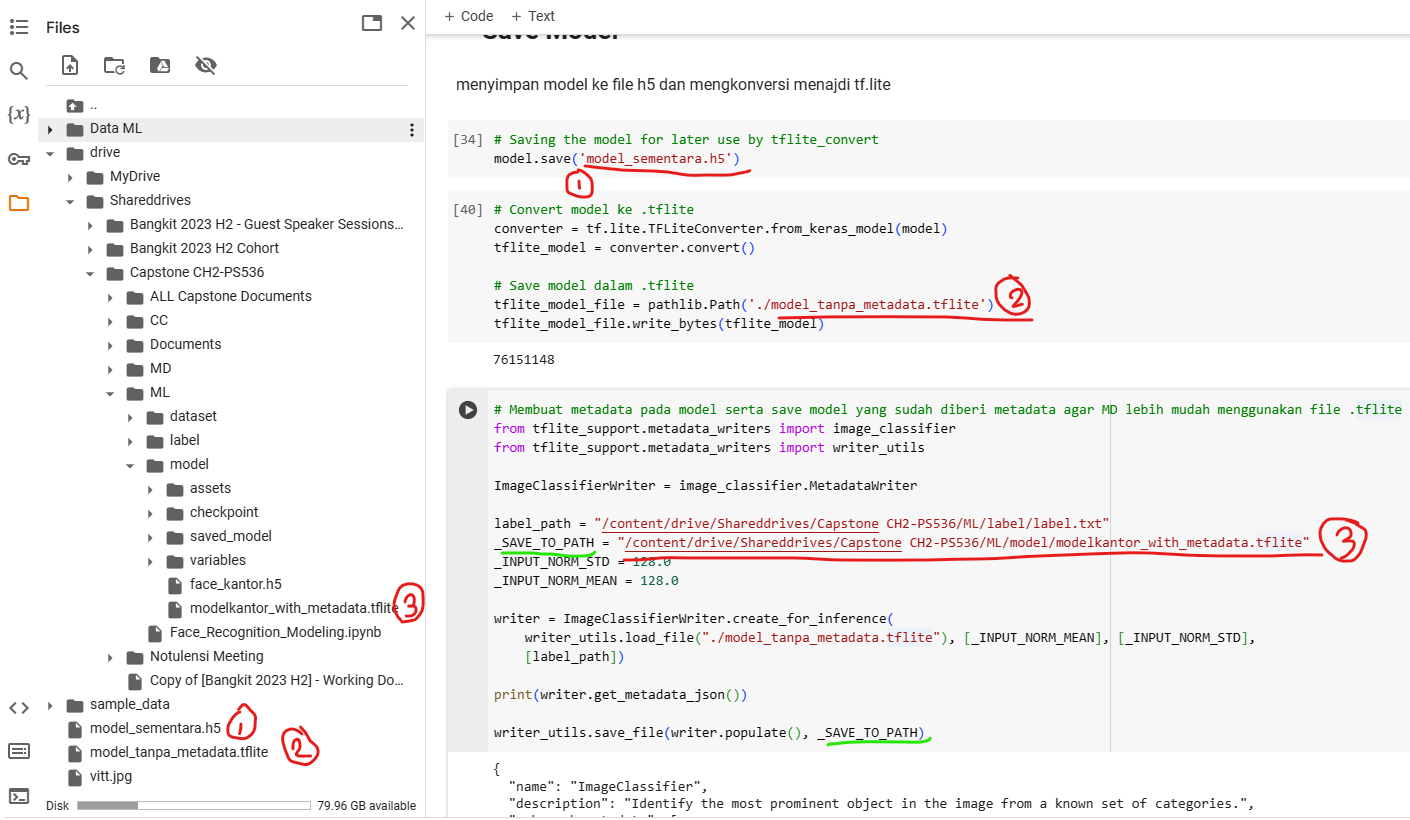

In [ ]:
# Saving the model for later use by tflite_convert
model.save('model_sementara.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Convert model ke .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save model dalam .tflite
tflite_model_file = pathlib.Path('./model_tanpa_metadata_v3.tflite')
tflite_model_file.write_bytes(tflite_model)

76151044

In [ ]:
# Membuat metadata pada model serta save model yang sudah diberi metadata agar MD lebih mudah menggunakan file .tflite
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ImageClassifierWriter = image_classifier.MetadataWriter

label_path = "/content/drive/Shareddrives/Capstone CH2-PS536/ML/label/label.txt"
_SAVE_TO_PATH = "/content/drive/Shareddrives/Capstone CH2-PS536/ML/model/modelkantor_with_metadata_v3.tflite"
_INPUT_NORM_STD = 128.0
_INPUT_NORM_MEAN = 128.0

writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file("./model_tanpa_metadata_v3.tflite"), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [label_path])

print(writer.get_metadata_json())

writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  128.0
                ],
                "std": [
                  128.0
                ]
              }
            }
          ],
          "stats": {
            "max": [
              0.992188
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "